In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import os, re, glob
import matplotlib as mpl
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode']=True
# matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True
import matplotlib.pyplot as plt

In [5]:
global_palette = "tab10"#["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"][:5]
ROOTS = {
#          "./08_13_graph_size_2500/async_sharing/": "Async", 
#         "./08_13_graph_size_2500/async_work_stealing_log_sharing/": "Async-Log",
#         "./08_13_graph_size_2500/no_sharing/": "None",
#         "./08_13_graph_size_2500/log_sharing/": "Log",
    
#       "./8_03_work_sharing_async/": "Async", 
#         "./8_03_no_work_sharing/": "None",
#         "./8_03_work_sharing_sync/": "Sync",
#         "./8_07_no_work_sharing_log_dist/": "Log",
    
#     "./10_17_se3_twistycool/async/": "Async", 
#         "./10_17_se3_twistycool/none/": "None",
#         "./10_17_se3_twistycool/sync/": "Sync",
#         "./10_17_se3_twistycool/log/": "Log",
#     "./10_17_se3_twistycool/async_log/": "Async-Log"
}
# algorithm_names = {"prm_fixed_graph": "PRM Fixed Graph", "prm_common_seed": "PRM Common Seed"}
algorithm_names = {"prm_common_seed": "PRM Common Seed"}
# algorithm_names = {"prm_fixed_graph": "PRM Fixed Graph"}
scenario = "se3_cubicles"
ROOT = "./10_20_se3_cubicles/"

### Lambda Start/ End time 

In [7]:
plot_lambdas = sorted([128])
plot_lambdas_id = "-".join(str(first) for first in plot_lambdas)
df = None
SAVE_ROOT = "../build/aggregate_figures/{}/{}".format(scenario, plot_lambdas_id)
if not os.path.exists(SAVE_ROOT): os.makedirs(SAVE_ROOT)

# for root, root_name in ROOTS.items():
#     curr_df = pd.read_csv("{}/lambda_start_end_times.csv".format(root))
#     curr_df = curr_df[curr_df["num_lambdas"].isin(plot_lambdas)]
#     curr_df = curr_df[curr_df["scenario"] == scenario]
# #     curr_df = curr_df[curr_df["trial_num"]!= "trial=1"]
#     curr_df["root_name"] = root_name
#     if df is None:
#         df = curr_df
#     else:
#         df = pd.concat([df, curr_df])
df = pd.read_csv("{}/lambda_start_end_times.csv".format(ROOT))
df = df[df["num_lambdas"].isin(plot_lambdas)]
df = df[df["scenario"] == scenario]

alg_name_map = {
    "async": "Async",
    "async-log": "Async-Log",
    "sync": "Sync",
    "none": "None",
    "log": "Log",
    "modulo": "Modulo"
}

df["root_name"] = df.apply(lambda row: alg_name_map[row["algorithm"]], axis=1) 

In [8]:
df["identifier"] = list(zip(df.root_name, df.num_lambdas, df.num_samples, ))
cost_per_100_ms = 0.0000048958
df["cost"] = np.ceil(df["lambda_duration"] / 100) * cost_per_100_ms
df.loc[df["root_name"] == "None", "num_samples"] = 10 # set common packet size for no work sharing
df.loc[df["root_name"] == "Log", "num_samples"] = 20 # set common packet size for no work sharing

df

,Unnamed: 0,algorithm,graph_size,lambda_duration,lambda_end_time,lambda_start_time,num_lambdas,num_samples,random_seed,scenario,trial_num,root_name,identifier,cost
0,0,none,17000,4336,4427,91,128,10,10,se3_cubicles,0,None,"(None, 128, 128)",0.000215
1,1,none,17000,8521,8656,135,128,10,10,se3_cubicles,0,None,"(None, 128, 128)",0.000421
2,2,none,17000,9322,9538,216,128,10,10,se3_cubicles,0,None,"(None, 128, 128)",0.000460
3,3,none,17000,12310,12617,307,128,10,10,se3_cubicles,0,None,"(None, 128, 128)",0.000607
4,4,none,17000,12470,12793,323,128,10,10,se3_cubicles,0,None,"(None, 128, 128)",0.000612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34811,34811,log,17000,8030,11809,3779,128,20,8,se3_cubicles,0,Log,"(Log, 128, 128)",0.000397
34812,34812,log,17000,8670,12465,3795,128,20,8,se3_cubicles,0,Log,"(Log, 128, 128)",0.000426
34813,34813,log,17000,9643,13457,3814,128,20,8,se3_cubicles,0,Log,"(Log, 128, 128)",0.000475
34814,34814,log,17000,8418,12246,3828,128,20,8,se3_cubicles,0,Log,"(Log, 128, 128)",0.000416


In [9]:
df.groupby("identifier").count()

,Unnamed: 0,algorithm,graph_size,lambda_duration,lambda_end_time,lambda_start_time,num_lambdas,num_samples,random_seed,scenario,trial_num,root_name,cost
identifier,,,,,,,,,,,,,
"(Async, 128, 1)",2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048
"(Async, 128, 4)",2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048
"(Async, 128, 16)",2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048
"(Async, 128, 32)",2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048
"(Async, 128, 64)",2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048
"(Async-Log, 128, 1)",2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048
"(Async-Log, 128, 4)",2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048
"(Async-Log, 128, 16)",2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048
"(Async-Log, 128, 32)",2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048


In [10]:
df.random_seed.unique()

array([10,  6, 15,  9,  7,  2,  0,  5, 14, 13, 12,  1,  3,  4, 11,  8])

In [11]:
df.root_name.unique()

array(['None', 'Sync', 'Async', 'Async-Log', 'Log'], dtype=object)

### Paper Plots (Less General)

In [12]:
SAVE_ROOT = "{}/paper_plots".format(SAVE_ROOT)
if not os.path.exists(SAVE_ROOT):
    os.makedirs(SAVE_ROOT)

SAVE_ROOT

'../build/aggregate_figures/se3_cubicles/128/paper_plots'

In [13]:
figsize = (3.45, 2.00) # ieee width
# figsize = (7, 3.50) # ieee width


# column name remap for better plotting
df = df.rename(columns={
    'algorithm': 'Algorithm',
    'graph_size': 'Graph Size',
    'lambda_duration': 'Lambda Duration (ms)',
    'lambda_end_time': 'Lambda End Time (ms)',
    'lambda_start_time': 'Lambda Start Time (ms)',
    'num_lambdas': 'Num Lambdas',
    'num_samples': 'Packet Size',
    'scenario': 'Scenario',
    'root_name': 'Work Sharing Method',
    'cost': 'Cost (\$)'
})
ext = "pdf"
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode']=True
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True

/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.


In [24]:
df.columns
# df = df[~(df["Work Sharing Method"] == "No Work Sharing")]

Index(['Unnamed: 0', 'Algorithm', 'Graph Size', 'Lambda Duration (ms)',
       'Lambda End Time (ms)', 'Lambda Start Time (ms)', 'Num Lambdas',
       'Packet Size', 'random_seed', 'Scenario', 'trial_num',
       'Work Sharing Method', 'identifier', 'Cost (\$)'],
      dtype='object')

In [25]:
len(df[(df["Algorithm"] == "async") & (df["Packet Size"] == 1)])

2048

In [16]:
len(df[df["identifier"] == ("Async", 128, 1)]), len(df[df["identifier"] == ("Sync", 128, 1)])

(1919, 1920)

### Parallelism Plots and Metrics By Packet Size

/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
0            1          128                 14292                  1.0
   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
1            4          128                 13898                  1.0
   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
2           16          128                 13184                  1.0
   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
3           32          128                 13747                  1.0
   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
4           64          128                 14382                  1.0


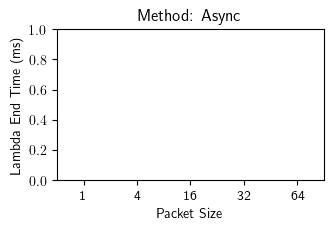

/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
0            1          128                 14236                  1.0
   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
1            4          128                 13707                  1.0
   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
2           16          128                 13215                  1.0
   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
3           32          128                 13425                  1.0
   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
4           64          128                 12990                  1.0


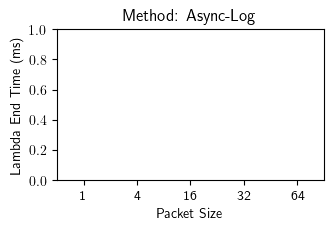

/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/raghav/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
0           20          128                 13074                  1.0


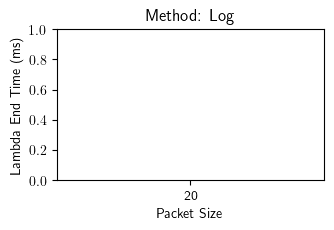

/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/raghav/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
0           10          128                 14889                  1.0


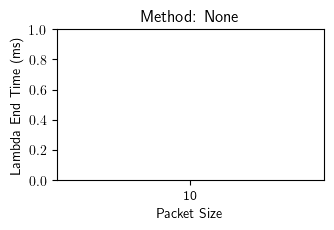

/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
0            1          128                 14846                  1.0
   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
1            4          128                 14909                  1.0
   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
2           16          128                 14512                  1.0
   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
3           32          128                 14764                  1.0
   Packet Size  Num Lambdas  Lambda End Time (ms)  parallel_efficiency
4           64          128                 14926                  1.0


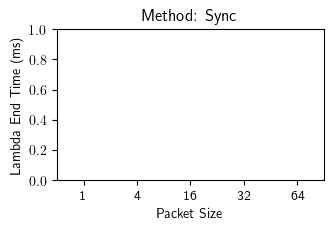

In [18]:
for (graph_size, method), group in df.groupby(["Graph Size", "Work Sharing Method",]):
    group = group.groupby(["Packet Size",  "trial_num", "random_seed", "Num Lambdas"], as_index=False).agg(
        {
            "Lambda End Time (ms)": np.max
        }
    )
    
    group = group.groupby(["Packet Size", "Num Lambdas"], as_index=False).agg(
        {
            "Lambda End Time (ms)": np.median
        }
    )
    # compute metrics
    for packet_size, metrics_group in group.groupby(["Packet Size"], as_index=False):
        baseline_lambdas = min(plot_lambdas)
        baseline_row = metrics_group[metrics_group["Num Lambdas"] == baseline_lambdas]
        metrics_group["parallel_efficiency"] = (float(baseline_row["Lambda End Time (ms)"]) / metrics_group["Lambda End Time (ms)"]) / (metrics_group["Num Lambdas"] / int(baseline_row["Num Lambdas"]))
        print(metrics_group)
    # plot
    plt.figure(figsize=figsize, dpi=100)
    g = sns.boxplot(data=group, x="Packet Size", y="Lambda End Time (ms)", hue="Num Lambdas", 
                    palette=[u'#1f77b4', u'#ff7f0e', 'red', 'green'], 
                    hue_order=["Async", "Sync", "None", "Log"],
                   )
    g.legend_.remove()
    plt.title("Method: {}".format(method))
    plt.savefig("{}/lambda_parallelism_graph_size_{}_method_{}.{ext}".format(SAVE_ROOT, graph_size, method, ext=ext), bbox_inches="tight")
    plt.show()

/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


   Num Lambdas Work Sharing Method  Lambda End Time (ms)  parallel_efficiency
0          128               Async                 40309                  1.0


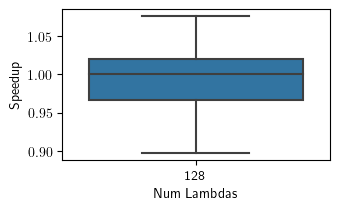

In [9]:
for graph_size, group in df.groupby(["Graph Size", ]):
#     break
    group = group[(group["Work Sharing Method"] == "Async") & (group["Packet Size"] == 16)]
    group = group.groupby(["trial_num", "random_seed", "Num Lambdas", "Work Sharing Method"], as_index=False).agg(
        {
            "Lambda End Time (ms)": np.max
        }
    )
    
    further_group = group.groupby(["Num Lambdas", "Work Sharing Method"], as_index=False).agg(
        {
            "Lambda End Time (ms)": np.median
        }
    )
    # compute metrics
    for packet_size, metrics_group in further_group.groupby(["Work Sharing Method"], as_index=False):
        baseline_lambdas = min(plot_lambdas)
        baseline_row = metrics_group[metrics_group["Num Lambdas"] == baseline_lambdas]
        metrics_group["parallel_efficiency"] = (float(baseline_row["Lambda End Time (ms)"]) / metrics_group["Lambda End Time (ms)"]) / (metrics_group["Num Lambdas"] / int(baseline_row["Num Lambdas"]))
        print(metrics_group)
    
    # plot
    group["Speedup"] = float(baseline_row["Lambda End Time (ms)"]) / group["Lambda End Time (ms)"]
    plt.figure(figsize=figsize, dpi=100)
    g = sns.boxplot(data=group, x="Num Lambdas", y="Speedup")
    plt.savefig("{}/lambda_parallelism_graph_size_{}.{ext}".format(SAVE_ROOT, graph_size, ext=ext), bbox_inches="tight")
    plt.show()

### Plots with baselines separate

In [14]:
def restyle_boxplot(artist_dict, color, props):
    """Take a drawn matplotlib boxplot and make it look nice."""
    linewidth = mpl.rcParams["lines.linewidth"]
    fliersize = 5
    gray = (0, 0, 0)
    
    for box in artist_dict["boxes"]:
        box.update(dict(facecolor=color,
                        zorder=.9,
                        edgecolor=gray,
                        linewidth=linewidth))
#         box.update(props["box"])
    for whisk in artist_dict["whiskers"]:
        whisk.update(dict(color=gray,
                          linewidth=linewidth,
                          linestyle="-"))
#         whisk.update(props["whisker"])
    for cap in artist_dict["caps"]:
        cap.update(dict(color=gray,
                        linewidth=linewidth))
#         cap.update(props["cap"])
    for med in artist_dict["medians"]:
        med.update(dict(color=gray,
                        linewidth=linewidth))
#         med.update(props["median"])
    for fly in artist_dict["fliers"]:
        fly.update(dict(markerfacecolor=gray,
                        marker="d",
                        markeredgecolor=gray,
                        markersize=fliersize))
#         fly.update(props["flier"])


In [15]:
def plot_by_param(y, group, name, ext="png"):
    less_group = group[~((group["Work Sharing Method"] == "None") | (group["Work Sharing Method"] == "Log") | (group["Work Sharing Method"] == "Modulo"))]
    fig, ax = plt.subplots(figsize=figsize, dpi=100)
    g = sns.boxplot(y=y, x="Packet Size", hue="Work Sharing Method", data=less_group, ax=ax, palette=[u'#1f77b4', u'#ff7f0e', 'yellow'], hue_order=["Async", "Sync", "Async-Log"])
    g.legend_.remove()
    bplot = ax.boxplot(group[group["Work Sharing Method"] == "None"][y], vert=True, patch_artist=True, positions=[5], widths=0.5, labels=["None"], )
    restyle_boxplot(bplot, "red", None)
    
    bplot = ax.boxplot(group[group["Work Sharing Method"] == "Log"][y], vert=True, patch_artist=True, positions=[6], widths=0.5, labels=["Log"], )
    restyle_boxplot(bplot, "green", None)
    
    bplot = ax.boxplot(group[group["Work Sharing Method"] == "Modulo"][y], vert=True, patch_artist=True, positions=[7], widths=0.5, labels=["Modulo"], )
    restyle_boxplot(bplot, "brown", None)
    plt.savefig("{}/{}.{ext}".format(SAVE_ROOT, name, ext=ext), bbox_inches="tight")
    
    # plot without axis
    fig, ax = plt.subplots(figsize=figsize, dpi=100)
    g = sns.boxplot(y=y, x="Packet Size", hue="Work Sharing Method", data=less_group, ax=ax, palette=[u'#1f77b4', u'#ff7f0e', 'yellow'], hue_order=["Async", "Sync", "Async-Log"])
    g.legend_.remove()
    bplot = ax.boxplot(group[group["Work Sharing Method"] == "None"][y], vert=True, patch_artist=True, positions=[5], widths=0.5, labels=["None"], )
    restyle_boxplot(bplot, "red", None)
    
    bplot = ax.boxplot(group[group["Work Sharing Method"] == "Log"][y], vert=True, patch_artist=True, positions=[6], widths=0.5, labels=["Log"], )
    restyle_boxplot(bplot, "green", None)
    ax.get_yaxis().label.set_visible(False)
    ax.get_xaxis().set_visible(False)
    plt.savefig("{}/NOAXIS_{}.{ext}".format(SAVE_ROOT, name, ext=ext), bbox_inches="tight")

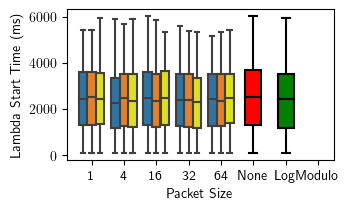

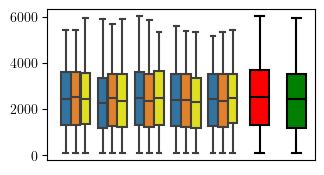

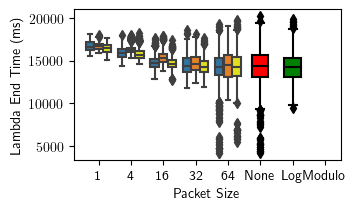

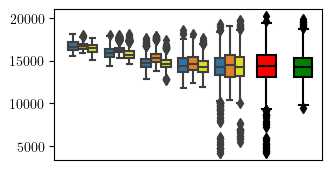

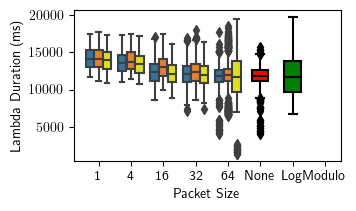

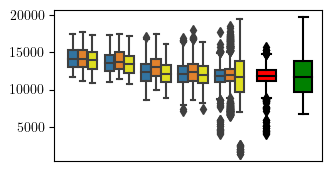

In [16]:
for (graph_size, num_lambdas), group in df.groupby(["Graph Size", "Num Lambdas"]):
    group = group.reset_index()
    plot_by_param("Lambda Start Time (ms)", group, "lambda_start_time_gs{}_n{}".format(graph_size, num_lambdas))
    plot_by_param("Lambda End Time (ms)", group, "lambda_end_time_gs{}_n{}".format(graph_size, num_lambdas))
    plot_by_param("Lambda Duration (ms)", group, "lambda_duration_gs{}_n{}".format(graph_size, num_lambdas))


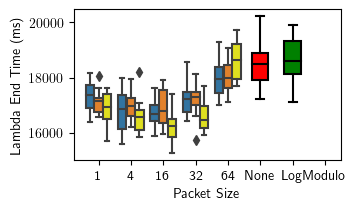

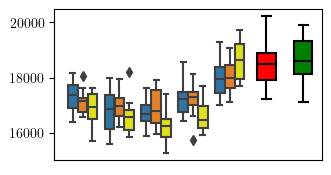

In [17]:
for (graph_size, num_lambdas), group in df.groupby(["Graph Size", "Num Lambdas"]):
    group = group.groupby(["Packet Size", "random_seed", "trial_num", "Work Sharing Method"], as_index=False).agg({"Lambda End Time (ms)": max})
    plot_by_param("Lambda End Time (ms)", group, "lambda_last_end_time_gs{}_n{}".format(graph_size, num_lambdas))

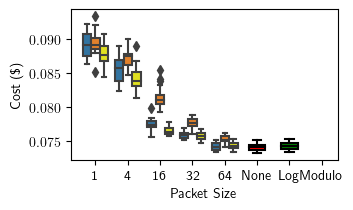

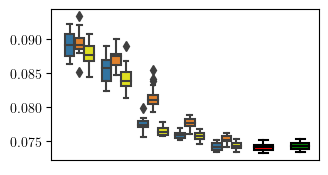

In [18]:
for (graph_size, num_lambdas), group in df.groupby(["Graph Size", "Num Lambdas"]):
    group = group.groupby(["Packet Size", "trial_num", "random_seed", "Work Sharing Method"], as_index=False).agg({"Cost (\$)": sum})
    plot_by_param("Cost (\$)", group, "cost_gs{}_n{}".format(graph_size, num_lambdas))

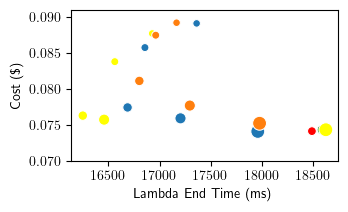

In [23]:
for (graph_size), group in df.groupby(["Graph Size", ]):
    group = group.groupby(["Packet Size", "Work Sharing Method", "trial_num", "random_seed", "Num Lambdas"], as_index=False).agg(
        {
            "Cost (\$)": sum,
            "Lambda End Time (ms)": np.max
        }
    )
    
    group = group.groupby(["Packet Size", "Work Sharing Method", "Num Lambdas"], as_index=False).agg(
        {
            "Cost (\$)": np.median,
            "Lambda End Time (ms)": np.median
        }
    )
#     group = group[~(group["Work Sharing Method"] == "No Work Sharing")]
    plt.figure(figsize=figsize, dpi=100)
    sns.scatterplot(data=group, x="Lambda End Time (ms)", y="Cost (\$)", 
                    hue="Work Sharing Method", size="Packet Size", legend=False,
                    hue_order=["Async", "Sync", "Async-Log", "None", "Log", "Modulo"],
                   sizes=(30,100), palette=[u'#1f77b4', u'#ff7f0e', 'yellow', 'red', 'green', 'brown'])
    plt.ylim([0.07,0.091])
    plt.savefig("{}/lambda_cost-endtime_gs{}_nl{}.{ext}".format(SAVE_ROOT, graph_size, num_lambdas, ext=ext), bbox_inches="tight")
    plt.show()

### Timing experiments plots

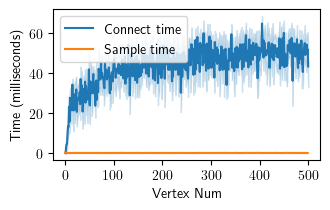

In [66]:
VERTEX_WORK_TIME = re.compile(".*Vertex num (.*) time to connect: (.*)")
VERTEX_SAMPLE_TIME = re.compile(".*Vertex (.*) time to sample (.*)")
xlabel = "Time (milliseconds)"
ylabel = "Vertex Num"
df = {
    xlabel: [],
    "Vertex Num": [],
    "Type": [],
}
for fil in glob.glob("./work_estimation_outs/*.txt"):
    with open(fil, 'r') as f:
        for lin in f.readlines():
#             print(lin)
            ret = VERTEX_WORK_TIME.match(lin)
            if ret is not None:
                vertex_num = int(ret.group(1))
                time = int(ret.group(2))
                df[xlabel].append(time)
                df["Vertex Num"].append(vertex_num)
                df["Type"].append("Connect time")

for fil in glob.glob("./sample_time_outs/*.txt"):
    with open(fil, 'r') as f:
        last_time = 0
        for lin in f.readlines():
#             print(lin)
            ret = VERTEX_SAMPLE_TIME.match(lin)
            if ret is not None:
                vertex_num = int(ret.group(1)) - 1
                time = int(ret.group(2)) - last_time
                last_time = int(ret.group(2))
                df[xlabel].append(time)
                df["Vertex Num"].append(vertex_num)
                df["Type"].append("Sample time")                

df = pd.DataFrame(df)
df[xlabel] = df[xlabel] / 1000 # convert microseconds to milliseconds
fig, ax = plt.subplots(figsize=figsize, dpi=100)
g = sns.lineplot(data=df, x="Vertex Num", y=xlabel, hue="Type", n_boot=50, ax=ax, legend='full')
## remove legend title
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

plt.savefig("{}/sample_time.{ext}".format(SAVE_ROOT, ext=ext), bbox_inches="tight")

In [198]:
SAVE_ROOT

'../build/aggregate_figures/32-64-128/paper_plots'

In [67]:
ext

'pdf'